# Part 01 ? Qubits, Circuits, Measurement, and the Bloch Sphere
You will build one qubit, measure it, and visualize the state and results.


GOAL: Understand what a circuit diagram means (why qubits look like wires).


EXPLANATION:
- The circuit is a **timeline**; the line is *not* a physical wire. It shows the same qubit over time.
- We use circuits because they are visual, match hardware timing, and fit the unitary + measurement model.
- Other representations include:
  ? **Statevector**: |?? = ?|0? + ?|1? (size grows as 2^n)
  ? **Matrices/operators**: gates are matrices
  ? **Bloch sphere**: single?qubit pure states as points on a sphere
  ? **Density matrix**: mixed/noisy states
  ? **OpenQASM/text**: circuits as code


In [ ]:
# Import the circuit builder.
from qiskit import QuantumCircuit
# Import statevector for Bloch visualization.
from qiskit.quantum_info import Statevector
# Import plotting helpers for histograms and Bloch spheres.
from qiskit.visualization import plot_histogram, plot_bloch_multivector
# Import matplotlib for showing figures.
import matplotlib.pyplot as plt
# Import display to render diagrams in VS Code notebooks.
from IPython.display import display
# Import sys to show Python version.
import sys
# Import qiskit to show its version.
import qiskit
# Import display and matplotlib (needed for VS Code notebooks).
from IPython.display import display  
import matplotlib.pyplot as plt





# Print versions to confirm installation.
print('Python version:', sys.version)
print('Qiskit version:', qiskit.__version__)
print('Ready')


Python version: 3.11.14 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 18:30:03) [MSC v.1929 64 bit (AMD64)]
Qiskit version: 2.3.0
? Ready


GOAL: Create a 1-qubit circuit (it starts in |0? by default).


EXPLANATION:
Qubits start in |0? because it is the ground state and easiest to prepare (like a reset).


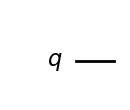

In [2]:
# Create a circuit with 1 qubit (no classical bits yet).
qc0 = QuantumCircuit(1)
# Draw the circuit diagram.
display(qc0.draw(output='mpl'))
# Show the diagram in VS Code.
plt.show()


GOAL: Visualize |0? on the Bloch sphere (state BEFORE measurement).


EXPLANATION:
The Bloch sphere shows the quantum state *at a moment in time*. Measurement collapses the state,
so we visualize the state **before** measuring.


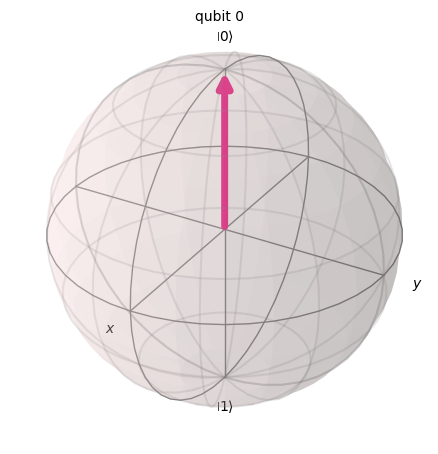

In [ ]:
# Convert the circuit into a statevector (no measurement here)
sv0 = Statevector.from_instruction(qc0)

# Plot Bloch sphere and DISPLAY it
bloch = plot_bloch_multivector(sv0)
display(bloch)


GOAL: Measure the qubit and view a histogram (shots and counts).


EXPLANATION:
A **shot** is one repeat of the circuit. We repeat many times to estimate probabilities.
The histogram shows **counts** (how many times we saw 0 or 1).


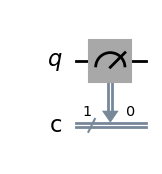

AttributeError: 'PrimitiveResult' object has no attribute 'quasi_dists'

In [9]:
# Create a circuit with 1 qubit and 1 classical bit for measurement.
qc0m = QuantumCircuit(1, 1)
# Measure qubit 0 into classical bit 0.
qc0m.measure(0, 0)
# Draw the measured circuit.
display(qc0m.draw(output='mpl'))
plt.show()

# Use StatevectorSampler if available (lightweight).
try:
    from qiskit.primitives import StatevectorSampler
    sampler = StatevectorSampler()
except Exception:
    # Fallback to standard Sampler if needed.
    from qiskit.primitives import Sampler
    sampler = Sampler()

# Run with 1024 shots and get counts.
result = sampler.run([qc0m], shots=1024).result()
quasi = result.quasi_dists[0]
counts = {k: int(v * 1024) for k, v in quasi.items()}
print('Counts:', counts)
# Plot histogram of measurement results.
plot_histogram(counts)
plt.show()


WHAT TO NOTICE:
You should see mostly (or all) '0' because the state was |0?.


GOAL: Create superposition using H: H|0? = |+?.


EXPLANATION:
Superposition means the state is ?|0? + ?|1?.
It is not classically 'both'; measurement gives 0 with probability |?|? and 1 with |?|?.


In [ ]:
# Build a circuit with H to create |+>.
qc_plus = QuantumCircuit(1)
qc_plus.h(0)
# Draw the circuit.
display(qc_plus.draw(output='mpl'))
plt.show()
# Visualize the state on the Bloch sphere.
sv_plus = Statevector.from_instruction(qc_plus)
plot_bloch_multivector(sv_plus)
plt.show()


GOAL: Measure H|0? and see ~50/50 counts.


In [ ]:
# Build a measured circuit for H|0>.
qc_plus_m = QuantumCircuit(1, 1)
qc_plus_m.h(0)
qc_plus_m.measure(0, 0)
# Draw the circuit.
display(qc_plus_m.draw(output='mpl'))
plt.show()
# Run with 200 shots to see sampling noise.
result_plus = sampler.run([qc_plus_m], shots=200).result()
quasi_plus = result_plus.quasi_dists[0]
counts_plus = {k: int(v * 200) for k, v in quasi_plus.items()}
print('Counts:', counts_plus)
plot_histogram(counts_plus)
plt.show()


WHAT TO NOTICE:
The Bloch sphere moved from the north pole to the equator, and the histogram is ~50/50.
With more shots, the split becomes more stable.


GOAL: Exercises (short, quick) ? validate your understanding.


EXERCISE:
1) Apply X on |0? then measure (expect ~100% '1').
2) Apply H on |0? then measure with 50 shots (expect noisy ~50/50).
3) Apply H on |0? then measure with 1000 shots (expect closer to 50/50).
4) Compare histogram stability as shots increase.
5) Predict the Bloch sphere for X|0? (should be |1?).
6) Create |-> by applying X then H (or H then Z).
7) Make 200 shots and observe around 50% zeros and 50% ones.


In [ ]:
# TODO 1: X on |0> then measure.
# qc_x = QuantumCircuit(1, 1)
# qc_x.x(0)
# qc_x.measure(0, 0)
# display(qc_x.draw(output='mpl'))
# plt.show()
# result_x = sampler.run([qc_x], shots=200).result()
# counts_x = {k: int(v * 200) for k, v in result_x.quasi_dists[0].items()}
# plot_histogram(counts_x)
# plt.show()

# TODO 2: H on |0> with 50 shots.
# qc_h50 = QuantumCircuit(1, 1)
# qc_h50.h(0)
# qc_h50.measure(0, 0)
# result_h50 = sampler.run([qc_h50], shots=50).result()
# counts_h50 = {k: int(v * 50) for k, v in result_h50.quasi_dists[0].items()}
# plot_histogram(counts_h50)
# plt.show()

# TODO 3: H on |0> with 1000 shots.
# qc_h1000 = QuantumCircuit(1, 1)
# qc_h1000.h(0)
# qc_h1000.measure(0, 0)
# result_h1000 = sampler.run([qc_h1000], shots=1000).result()
# counts_h1000 = {k: int(v * 1000) for k, v in result_h1000.quasi_dists[0].items()}
# plot_histogram(counts_h1000)
# plt.show()

# TODO 4: Compare stability as shots increase (50 vs 1000).
# TODO 5: Bloch sphere for X|0>.
# qc_x_state = QuantumCircuit(1)
# qc_x_state.x(0)
# sv_x = Statevector.from_instruction(qc_x_state)
# plot_bloch_multivector(sv_x)
# plt.show()

# TODO 6: Create |-> using X then H or H then Z.
# qc_minus = QuantumCircuit(1)
# qc_minus.x(0)
# qc_minus.h(0)
# sv_minus = Statevector.from_instruction(qc_minus)
# plot_bloch_multivector(sv_minus)
# plt.show()
